In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
data = pd.read_csv('twitchdata-update.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [7]:
data.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [20]:
numeric_data = data.select_dtypes(include=['number'])

# 1D Histograms

In [15]:
def report_statistics(column):
    # Ensure column is numeric
    # Convert to numeric, drop NaNs
    column = pd.to_numeric(column, errors='coerce').dropna()
    max_val = column.max()
    min_val = column.min()
    mean_val = column.mean()
    median_val = column.median()
    # Outliers using 1.5 IQR rule
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    # Detect outliers without boolean subtraction issues
    outliers = column[(column < (Q1 - 1.5 * IQR)) |
                      (column > (Q3 + 1.5 * IQR))]
    return max_val, min_val, mean_val, median_val, outliers

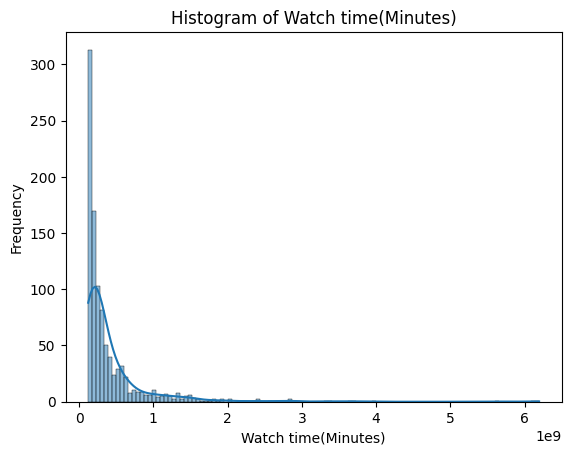

Watch time(Minutes) - Max: 6196161750, Min: 122192850, Mean: 418427930.13, Median: 234990787.5
Outliers in Watch time(Minutes):
 0      6196161750
1      6091677300
2      5644590915
3      3970318140
4      3671000070
          ...    
102     853324635
103     853049385
104     850636305
105     849083325
106     842581305
Name: Watch time(Minutes), Length: 107, dtype: int64


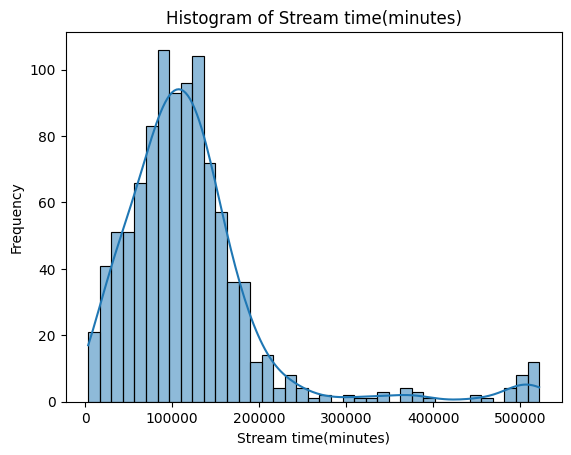

Stream time(minutes) - Max: 521445, Min: 3465, Mean: 120515.16, Median: 108240.0
Outliers in Stream time(minutes):
 2      515280
3      517740
30     486510
34     496950
49     505080
60     381735
75     314595
91     253395
107    460065
120    325935
131    487005
142    443130
145    446655
158    498765
165    344055
172    267465
181    273660
227    251250
232    508965
242    499575
250    301395
264    244560
283    362970
306    518415
308    336690
342    400770
392    521445
397    508140
415    339000
417    513540
433    517260
456    484455
469    517980
497    364425
500    278745
578    486000
605    496545
641    500010
651    379680
657    307005
698    365670
746    519675
758    514845
828    499215
890    509670
936    383955
983    373800
992    521430
Name: Stream time(minutes), dtype: int64


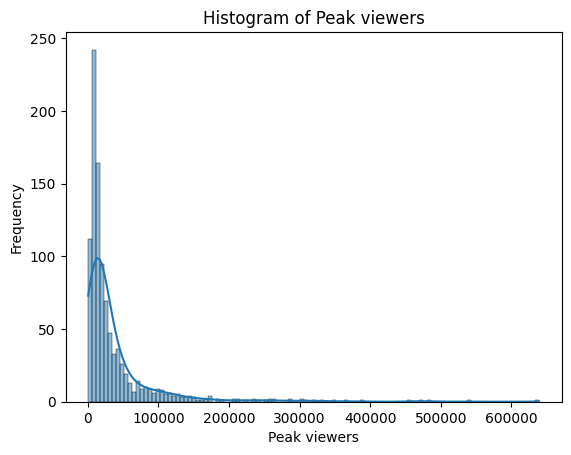

Peak viewers - Max: 639375, Min: 496, Mean: 37065.051, Median: 16676.0
Outliers in Peak viewers:
 0      222720
1      310998
2      387315
3      300575
4      285644
        ...  
772    126254
792    141406
811     98717
927    170131
968     81683
Name: Peak viewers, Length: 113, dtype: int64


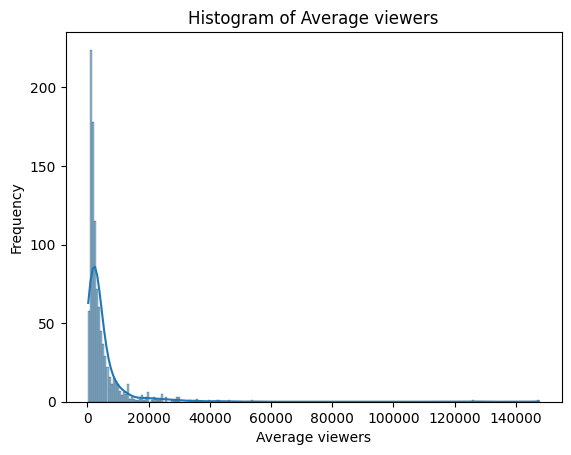

Average viewers - Max: 147643, Min: 235, Mean: 4781.04, Median: 2425.0
Outliers in Average viewers:
 0      27716
1      25610
2      10976
4      29602
5      42414
       ...  
811    22356
853    11696
927    19897
951    13741
990    35333
Name: Average viewers, Length: 100, dtype: int64


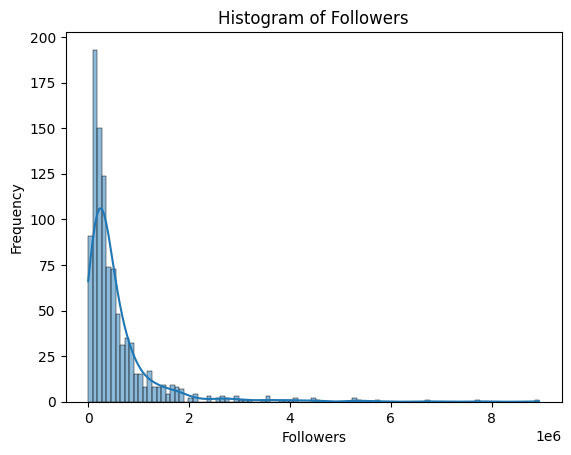

Followers - Max: 8938903, Min: 3660, Mean: 570054.068, Median: 318063.0
Outliers in Followers:
 0      3246298
1      5310163
2      1767635
3      3944850
4      8938903
        ...   
714    1677690
726    2137521
779    1474090
924    2115596
966    1866339
Name: Followers, Length: 89, dtype: int64


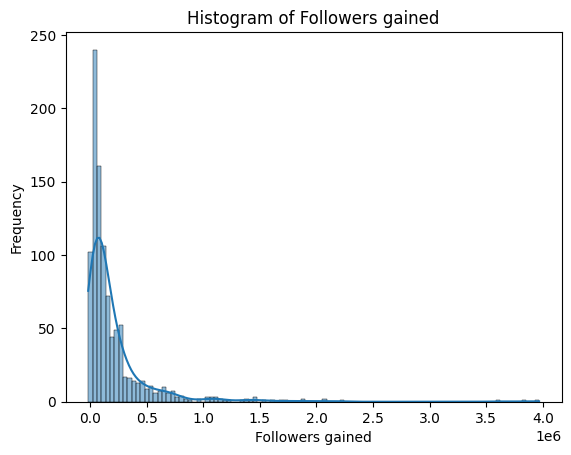

Followers gained - Max: 3966525, Min: -15772, Mean: 205518.534, Median: 98352.0
Outliers in Followers gained:
 0      1734810
1      1370184
2      1023779
3       703986
4      2068424
        ...   
841     724245
866     548578
955     530306
988     732108
995     562691
Name: Followers gained, Length: 90, dtype: int64


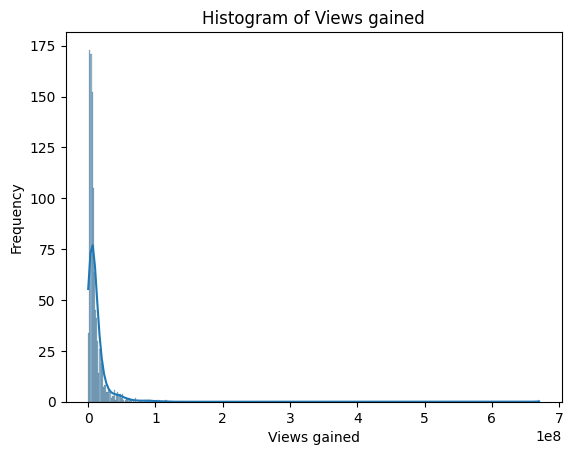

Views gained - Max: 670137548, Min: 175788, Mean: 11668165.613, Median: 6456323.5
Outliers in Views gained:
 0       93036735
1       89705964
2      102611607
3      106546942
4       78998587
         ...    
703    115312954
918     41833833
933     44291541
937     30889814
994     87603521
Name: Views gained, Length: 91, dtype: int64


In [17]:
for column in numeric_data.columns:
    plt.figure()
    sns.histplot(numeric_data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

    # Report statistics
    max_val, min_val, mean_val, median_val, outliers = report_statistics(
        numeric_data[column])
    print(f"{column} - Max: {max_val}, Min: {min_val}, Mean: {mean_val}, Median: {median_val}")
    print(f"Outliers in {column}:\n", outliers)

# Pair-wise Relationships

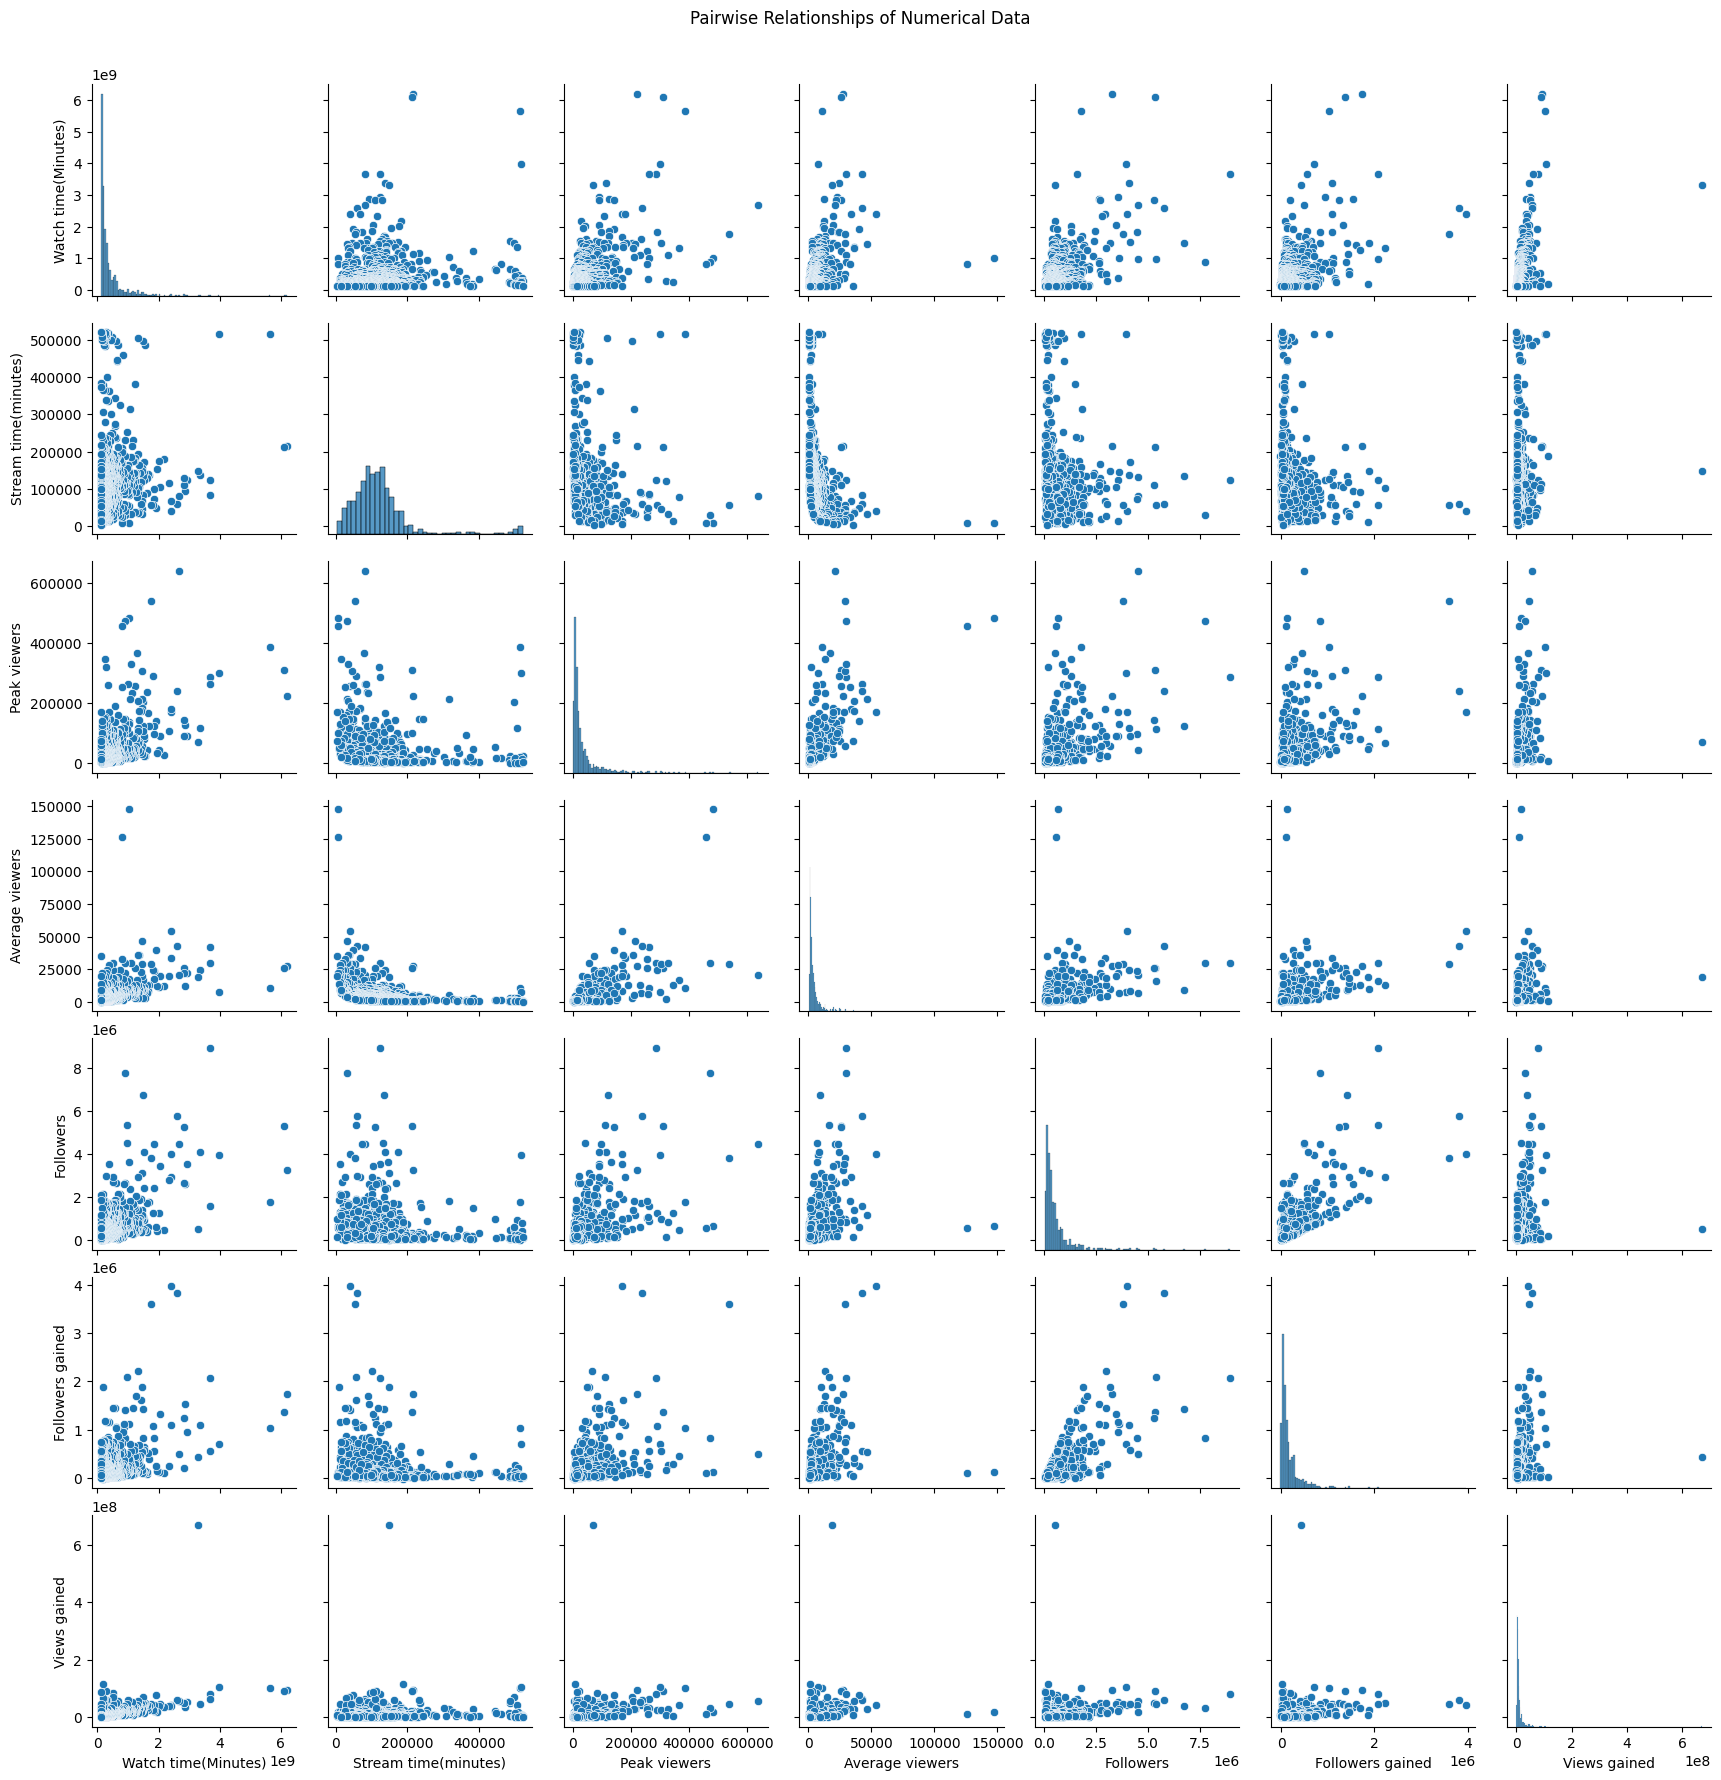

In [19]:
sns.pairplot(numeric_data)
plt.suptitle("Pairwise Relationships of Numerical Data", y=1.02)
plt.show()

# Categorical vs Categorical

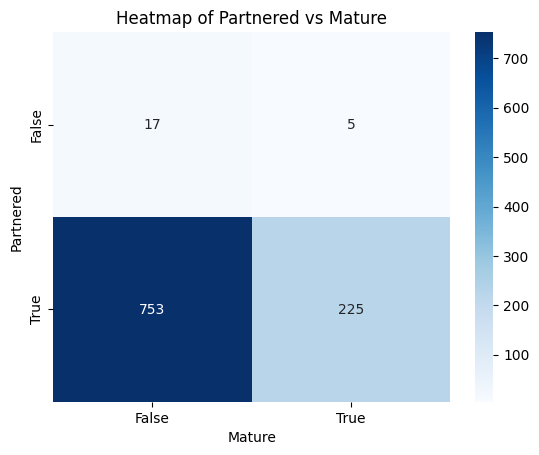

In [22]:
categorical_data = data.select_dtypes(include=['object', 'bool'])
category_x = 'Partnered'  # Replace with an actual column name if different
category_y = 'Mature'  # Replace with an actual column name if different
cat_cross_tab = pd.crosstab(data[category_x], data[category_y])

sns.heatmap(cat_cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title(f'Heatmap of {category_x} vs {category_y}')
plt.show()

# Categorical vs Numerical

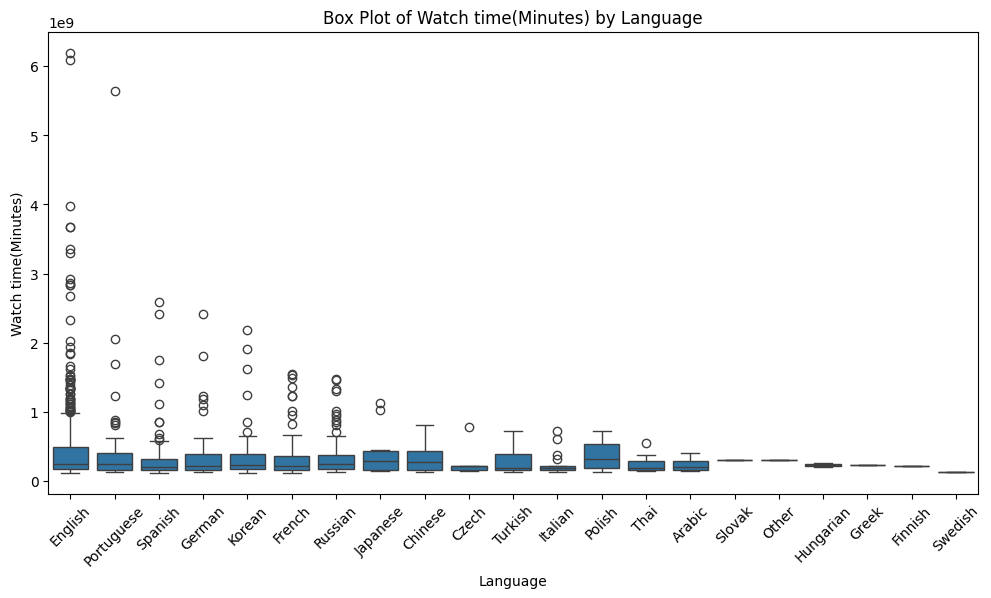

In [23]:
categorical_var = 'Language'  # Replace with an actual column name if different
# Replace with an actual column name if different
numeric_var = 'Watch time(Minutes)'
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x=categorical_var, y=numeric_var)
plt.title(f'Box Plot of {numeric_var} by {categorical_var}')
plt.xticks(rotation=45)
plt.show()